In [14]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
%matplotlib inline

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
stations = pd.read_csv('Clean_Data/stations_hour_use.csv')

In [11]:
stations.head()

capacity        lat        lon                 name short_name  station_id  \
0        37  40.722174 -73.983688    E 2 St & Avenue B    5515.02         301   
1        52  40.727408 -73.981420   E 10 St & Avenue A    5659.05         445   
2        34  40.733143 -73.975739  E 20 St & FDR Drive    5886.02         487   
3        44  40.732219 -73.981656      1 Ave & E 16 St    5779.08         504   
4        39  40.767272 -73.993929     W 52 St & 11 Ave    6926.01          72   

   startCount_0  endCount_0  startCount_1  endCount_1  startCount_2  \
0          10.0        15.0           9.0         6.0           2.0   
1           9.0        29.0           4.0        13.0           4.0   
2           2.0        18.0           2.0         7.0           0.0   
3          46.0        32.0          22.0        15.0          21.0   
4           4.0         3.0           2.0         2.0           1.0   

   endCount_2  startCount_3  endCount_3  startCount_4  endCount_4  \
0         5.0           1.0         3.0          10.0         4.0   
1         7.0           4.0         6.0           1.0         2.0   
2        12.0           2.0         3.0           3.0         2.0   
3        13.0           8.0         7.0           6.0         7.0   
4         5.0           0.0         2.0           0.0         1.0   

   startCount_5  endCount_5  startCount_6  endCount_6  startCount_7  \
0          16.0         4.0          47.0         5.0          57.0   
1           7.0         6.0          41.0        14.0          76.0   
2          38.0         1.0          82.0         4.0         136.0   
3          22.0         8.0          44.0        24.0          84.0   
4           4.0         9.0          24.0         3.0          25.0   

   endCount_7  startCount_8  endCount_8  startCount_9  endCount_9  \
0        25.0          96.0        26.0          72.0        19.0   
1        20.0         196.0        30.0         203.0        29.0   
2        27.0         124.0        34.0          54.0        38.0   
3        59.0         188.0        86.0         158.0        75.0   
4        45.0          58.0        41.0          43.0        50.0   

   startCount_10  endCount_10  startCount_11  endCount_11  startCount_12  \
0           58.0         36.0           61.0         53.0           57.0   
1          171.0         53.0          111.0         49.0           91.0   
2           28.0         23.0           55.0         38.0           52.0   
3          122.0        105.0           88.0         98.0           94.0   
4           65.0         50.0           40.0         35.0           36.0   

   endCount_12  startCount_13  endCount_13  startCount_14  endCount_14  \
0         38.0           46.0         51.0           46.0         52.0   
1         53.0           92.0         68.0           84.0         79.0   
2         46.0           51.0         54.0           58.0         80.0   
3        113.0          114.0        109.0          100.0        102.0   
4         31.0           27.0         35.0           33.0         29.0   

   startCount_15  endCount_15  startCount_16  endCount_16  startCount_17  \
0           64.0         76.0           69.0         79.0           69.0   
1           97.0        121.0           93.0         96.0           61.0   
2           57.0         84.0           81.0         98.0           81.0   
3          124.0        127.0          136.0        133.0          138.0   
4           50.0         33.0           44.0         34.0           67.0   

   endCount_17  startCount_18  endCount_18  startCount_19  endCount_19  \
0        113.0           69.0        132.0           77.0        112.0   
1        101.0           51.0        181.0           45.0        164.0   
2        152.0           69.0        178.0           64.0        123.0   
3        200.0          148.0        243.0          101.0        149.0   
4         45.0           43.0         54.0           43.0         29.0   

   startCount_20  endCount_2

In [12]:
stations.drop(['lat', 'lon', 'name', 'short_name'], axis=1, inplace=True)

In [13]:
stations.head()

capacity  station_id  startCount_0  endCount_0  startCount_1  endCount_1  \
0        37         301          10.0        15.0           9.0         6.0   
1        52         445           9.0        29.0           4.0        13.0   
2        34         487           2.0        18.0           2.0         7.0   
3        44         504          46.0        32.0          22.0        15.0   
4        39          72           4.0         3.0           2.0         2.0   

   startCount_2  endCount_2  startCount_3  endCount_3  startCount_4  \
0           2.0         5.0           1.0         3.0          10.0   
1           4.0         7.0           4.0         6.0           1.0   
2           0.0        12.0           2.0         3.0           3.0   
3          21.0        13.0           8.0         7.0           6.0   
4           1.0         5.0           0.0         2.0           0.0   

   endCount_4  startCount_5  endCount_5  startCount_6  endCount_6  \
0         4.0          16.0         4.0          47.0         5.0   
1         2.0           7.0         6.0          41.0        14.0   
2         2.0          38.0         1.0          82.0         4.0   
3         7.0          22.0         8.0          44.0        24.0   
4         1.0           4.0         9.0          24.0         3.0   

   startCount_7  endCount_7  startCount_8  endCount_8  startCount_9  \
0          57.0        25.0          96.0        26.0          72.0   
1          76.0        20.0         196.0        30.0         203.0   
2         136.0        27.0         124.0        34.0          54.0   
3          84.0        59.0         188.0        86.0         158.0   
4          25.0        45.0          58.0        41.0          43.0   

   endCount_9  startCount_10  endCount_10  startCount_11  endCount_11  \
0        19.0           58.0         36.0           61.0         53.0   
1        29.0          171.0         53.0          111.0         49.0   
2        38.0           28.0         23.0           55.0         38.0   
3        75.0          122.0        105.0           88.0         98.0   
4        50.0           65.0         50.0           40.0         35.0   

   startCount_12  endCount_12  startCount_13  endCount_13  startCount_14  \
0           57.0         38.0           46.0         51.0           46.0   
1           91.0         53.0           92.0         68.0           84.0   
2           52.0         46.0           51.0         54.0           58.0   
3           94.0        113.0          114.0        109.0          100.0   
4           36.0         31.0           27.0         35.0           33.0   

   endCount_14  startCount_15  endCount_15  startCount_16  endCount_16  \
0         52.0           64.0         76.0           69.0         79.0   
1         79.0           97.0        121.0           93.0         96.0   
2         80.0           57.0         84.0           81.0         98.0   
3        102.0          124.0        127.0          136.0        133.0   
4         29.0           50.0         33.0           44.0         34.0   

   startCount_17  endCount_17  startCount_18  endCount_18  startCount_19  \
0           69.0        113.0           69.0        132.0           77.0   
1           61.0        101.0           51.0        181.0           45.0   
2           81.0        152.0           69.0        178.0           64.0   
3          138.0        200.0          148.0        243.0          101.0   
4           67.0         45.0           43.0         54.0           43.0   

   endCount_19  startCount_20  endCount_20  startCount_21  endCount_21  \
0        112.0           27.0         89.0           25.0         60.0   
1        164.0           58.0        124.0           29.0         57.0   
2        123.0           40.0         86.0           21.0         57.0   
3        149.0           92.0        103.0           78.0         92.0   
4         29.0           10.0         27.0           13.0         13.0   

   startCount_22

In [34]:
stations_capacity = stations.set_index('station_id')
#stations_capacity.head()
stations_capacity = stations_capacity.astype('float')
stations_capacity.head()

capacity  startCount_0  endCount_0  startCount_1  endCount_1  \
station_id                                                                 
301             37.0          10.0        15.0           9.0         6.0   
445             52.0           9.0        29.0           4.0        13.0   
487             34.0           2.0        18.0           2.0         7.0   
504             44.0          46.0        32.0          22.0        15.0   
72              39.0           4.0         3.0           2.0         2.0   

            startCount_2  endCount_2  startCount_3  endCount_3  startCount_4  \
station_id                                                                     
301                  2.0         5.0           1.0         3.0          10.0   
445                  4.0         7.0           4.0         6.0           1.0   
487                  0.0        12.0           2.0         3.0           3.0   
504                 21.0        13.0           8.0         7.0           6.0   
72                   1.0         5.0           0.0         2.0           0.0   

            endCount_4  startCount_5  endCount_5  startCount_6  endCount_6  \
station_id                                                                   
301                4.0          16.0         4.0          47.0         5.0   
445                2.0           7.0         6.0          41.0        14.0   
487                2.0          38.0         1.0          82.0         4.0   
504                7.0          22.0         8.0          44.0        24.0   
72                 1.0           4.0         9.0          24.0         3.0   

            startCount_7  endCount_7  startCount_8  endCount_8  startCount_9  \
station_id                                                                     
301                 57.0        25.0          96.0        26.0          72.0   
445                 76.0        20.0         196.0        30.0         203.0   
487                136.0        27.0         124.0        34.0          54.0   
504                 84.0        59.0         188.0        86.0         158.0   
72                  25.0        45.0          58.0        41.0          43.0   

            endCount_9  startCount_10  endCount_10  startCount_11  \
station_id                                                          
301               19.0           58.0         36.0           61.0   
445               29.0          171.0         53.0          111.0   
487               38.0           28.0         23.0           55.0   
504               75.0          122.0        105.0           88.0   
72                50.0           65.0         50.0           40.0   

            endCount_11  startCount_12  endCount_12  startCount_13  \
station_id                                                           
301                53.0           57.0         38.0           46.0   
445                49.0           91.0         53.0           92.0   
487                38.0           52.0         46.0           51.0   
504                98.0           94.0        113.0          114.0   
72                 35.0           36.0         31.0           27.0   

            endCount_13  startCount_14  endCount_14  startCount_15  \
station_id                                                           
301                51.0           46.0         52.0           64.0   
445                68.0           84.0         79.0           97.0   
487                54.0           58.0         80.0           57.0   
504               109.0          100.0        102.0          124.0   
72                 35.0           33.0         29.0           50.0   

            endCount_15  startCount_16  endCount_16  startCount_17  \
station_id                                                           
301                76.0           69.0         79.0           69.0   
445               121.0           93.0         96.0           61.0   
487                84.0           81.0         98.0           81

In [35]:
stations_nocapacity = stations_capacity.drop(['capacity'], axis=1, inplace=False)
stations_nocapacity = stations_nocapacity.astype('float')
stations_nocapacity.head()

startCount_0  endCount_0  startCount_1  endCount_1  startCount_2  \
station_id                                                                     
301                 10.0        15.0           9.0         6.0           2.0   
445                  9.0        29.0           4.0        13.0           4.0   
487                  2.0        18.0           2.0         7.0           0.0   
504                 46.0        32.0          22.0        15.0          21.0   
72                   4.0         3.0           2.0         2.0           1.0   

            endCount_2  startCount_3  endCount_3  startCount_4  endCount_4  \
station_id                                                                   
301                5.0           1.0         3.0          10.0         4.0   
445                7.0           4.0         6.0           1.0         2.0   
487               12.0           2.0         3.0           3.0         2.0   
504               13.0           8.0         7.0           6.0         7.0   
72                 5.0           0.0         2.0           0.0         1.0   

            startCount_5  endCount_5  startCount_6  endCount_6  startCount_7  \
station_id                                                                     
301                 16.0         4.0          47.0         5.0          57.0   
445                  7.0         6.0          41.0        14.0          76.0   
487                 38.0         1.0          82.0         4.0         136.0   
504                 22.0         8.0          44.0        24.0          84.0   
72                   4.0         9.0          24.0         3.0          25.0   

            endCount_7  startCount_8  endCount_8  startCount_9  endCount_9  \
station_id                                                                   
301               25.0          96.0        26.0          72.0        19.0   
445               20.0         196.0        30.0         203.0        29.0   
487               27.0         124.0        34.0          54.0        38.0   
504               59.0         188.0        86.0         158.0        75.0   
72                45.0          58.0        41.0          43.0        50.0   

            startCount_10  endCount_10  startCount_11  endCount_11  \
station_id                                                           
301                  58.0         36.0           61.0         53.0   
445                 171.0         53.0          111.0         49.0   
487                  28.0         23.0           55.0         38.0   
504                 122.0        105.0           88.0         98.0   
72                   65.0         50.0           40.0         35.0   

            startCount_12  endCount_12  startCount_13  endCount_13  \
station_id                                                           
301                  57.0         38.0           46.0         51.0   
445                  91.0         53.0           92.0         68.0   
487                  52.0         46.0           51.0         54.0   
504                  94.0        113.0          114.0        109.0   
72                   36.0         31.0           27.0         35.0   

            startCount_14  endCount_14  startCount_15  endCount_15  \
station_id                                                           
301                  46.0         52.0           64.0         76.0   
445                  84.0         79.0           97.0        121.0   
487                  58.0         80.0           57.0         84.0   
504                 100.0        102.0          124.0        127.0   
72                   33.0         29.0           50.0         33.0   

            startCount_16  endCount_16  startCount_17  endCount_17  \
station_id                                                           
301                  69.0         79.0           69.0        113.0   
445                  93.0         96.0           61.0        101.0   
487                  81.0         98.0     

In [176]:
#stations_capacity
stations_ratio = stations_capacity.apply(lambda x: x/stations_capacity['capacity'], axis=0)
stations_ratio = stations_ratio.drop(['capacity'], axis=1, inplace=False)
stations_ratio.head()

startCount_0  endCount_0  startCount_1  endCount_1  startCount_2  \
station_id                                                                     
301             0.270270    0.405405      0.243243    0.162162      0.054054   
445             0.173077    0.557692      0.076923    0.250000      0.076923   
487             0.058824    0.529412      0.058824    0.205882      0.000000   
504             1.045455    0.727273      0.500000    0.340909      0.477273   
72              0.102564    0.076923      0.051282    0.051282      0.025641   

            endCount_2  startCount_3  endCount_3  startCount_4  endCount_4  \
station_id                                                                   
301           0.135135      0.027027    0.081081      0.270270    0.108108   
445           0.134615      0.076923    0.115385      0.019231    0.038462   
487           0.352941      0.058824    0.088235      0.088235    0.058824   
504           0.295455      0.181818    0.159091      0.136364    0.159091   
72            0.128205      0.000000    0.051282      0.000000    0.025641   

            startCount_5  endCount_5  startCount_6  endCount_6  startCount_7  \
station_id                                                                     
301             0.432432    0.108108      1.270270    0.135135      1.540541   
445             0.134615    0.115385      0.788462    0.269231      1.461538   
487             1.117647    0.029412      2.411765    0.117647      4.000000   
504             0.500000    0.181818      1.000000    0.545455      1.909091   
72              0.102564    0.230769      0.615385    0.076923      0.641026   

            endCount_7  startCount_8  endCount_8  startCount_9  endCount_9  \
station_id                                                                   
301           0.675676      2.594595    0.702703      1.945946    0.513514   
445           0.384615      3.769231    0.576923      3.903846    0.557692   
487           0.794118      3.647059    1.000000      1.588235    1.117647   
504           1.340909      4.272727    1.954545      3.590909    1.704545   
72            1.153846      1.487179    1.051282      1.102564    1.282051   

            startCount_10  endCount_10  startCount_11  endCount_11  \
station_id                                                           
301              1.567568     0.972973       1.648649     1.432432   
445              3.288462     1.019231       2.134615     0.942308   
487              0.823529     0.676471       1.617647     1.117647   
504              2.772727     2.386364       2.000000     2.227273   
72               1.666667     1.282051       1.025641     0.897436   

            startCount_12  endCount_12  startCount_13  endCount_13  \
station_id                                                           
301              1.540541     1.027027       1.243243     1.378378   
445              1.750000     1.019231       1.769231     1.307692   
487              1.529412     1.352941       1.500000     1.588235   
504              2.136364     2.568182       2.590909     2.477273   
72               0.923077     0.794872       0.692308     0.897436   

            startCount_14  endCount_14  startCount_15  endCount_15  \
station_id                                                           
301              1.243243     1.405405       1.729730     2.054054   
445              1.615385     1.519231       1.865385     2.326923   
487              1.705882     2.352941       1.676471     2.470588   
504              2.272727     2.318182       2.818182     2.886364   
72               0.846154     0.743590       1.282051     0.846154   

            startCount_16  endCount_16  startCount_17  endCount_17  \
station_id                                                           
301              1.864865     2.135135       1.864865     3.054054   
445              1.788462     1.846154       1.173077     1.942308   
487              2.382353     2.882353     

In [74]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    #print(KM)
    
#     KM = []
#     for k in K:
#         KM.append(KMeans(n_clusters=k).fit(data))
#         print(k)
    
    #print(KM)
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]


    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]

    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [123]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def silhouette_score_plot(data,range_n_clusters):
    X=data
    silhouette_score_max = 0
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(8, 8)

        #The 1st subplot is the silhouette plot
        #The silhouette coefficient can range from -1, 1 but in this example all
        #lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        #The (n_clusters+1)*10 is for inserting blank space between silhouette
        #plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        
        if silhouette_avg > silhouette_score_max:
            silhouette_score_max = silhouette_avg
            K = n_clusters
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
             # Aggregate the silhouette scores for samples belonging to
             # cluster i, and sort them
            ith_cluster_silhouette_values = \
                 sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_silhouette_values,
                               facecolor=color, edgecolor=color, alpha=0.7)

             # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

             # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

         # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.show()
    
    print("Max silhouette_score:", silhouette_score_max, "when K =", K)
    #return(K)

For stations_capacity --- kmeans

In [49]:
min_max_scaler_1 = MinMaxScaler()
df_scaled_1 = pd.DataFrame(min_max_scaler.fit_transform(stations_capacity), columns=stations_capacity.columns, index=stations_capacity.index)

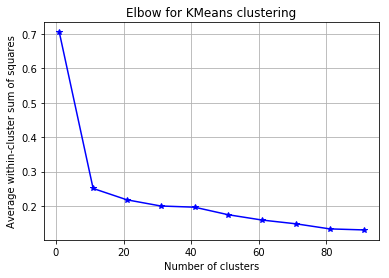

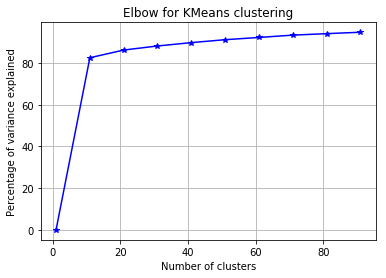

In [75]:
elbow(df_scaled_1, range(1,100,10))

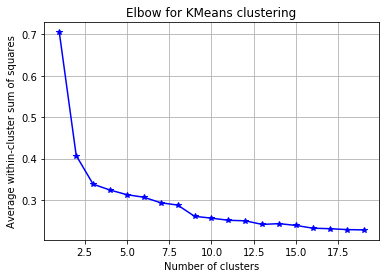

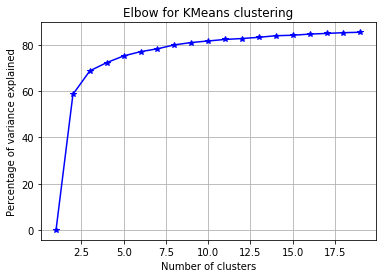

In [82]:
elbow(df_scaled_1, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.707573398358


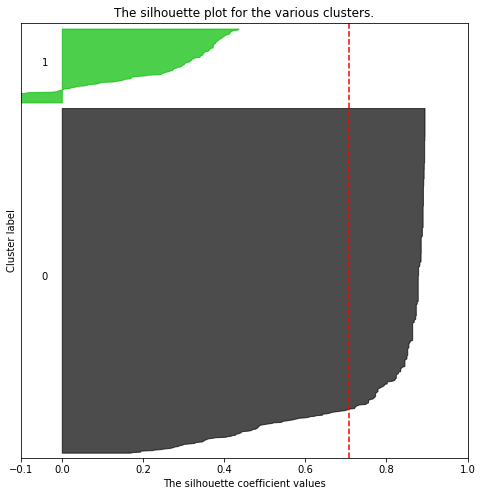

For n_clusters = 3 The average silhouette_score is : 0.644835837347


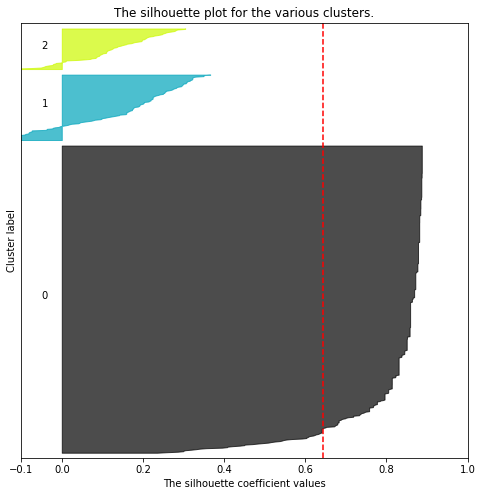

For n_clusters = 4 The average silhouette_score is : 0.644489026312


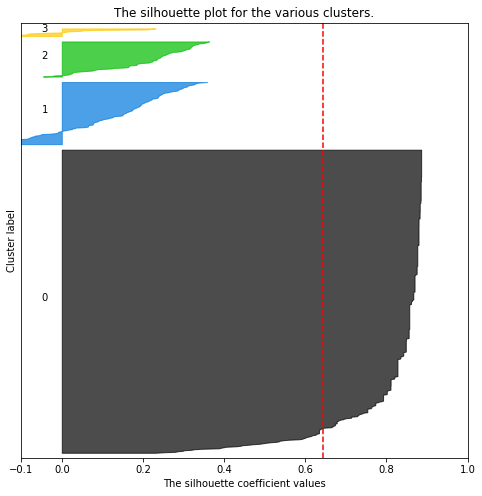

For n_clusters = 5 The average silhouette_score is : 0.630673072343


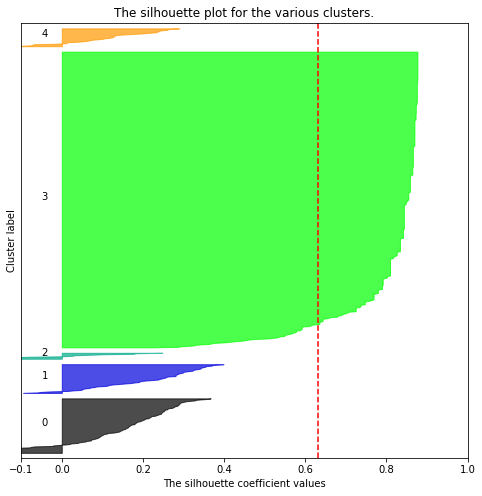

For n_clusters = 6 The average silhouette_score is : 0.636102662335


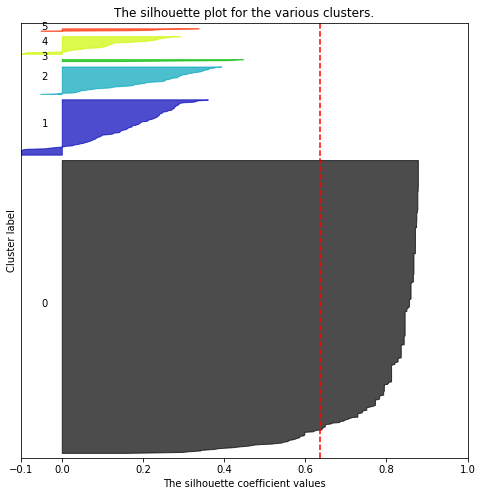

For n_clusters = 7 The average silhouette_score is : 0.578786515217


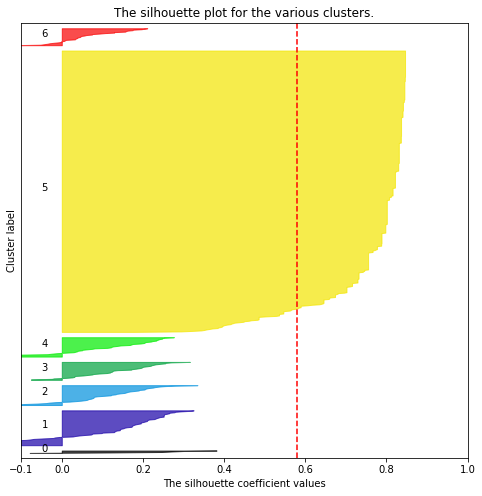

For n_clusters = 8 The average silhouette_score is : 0.587091970409


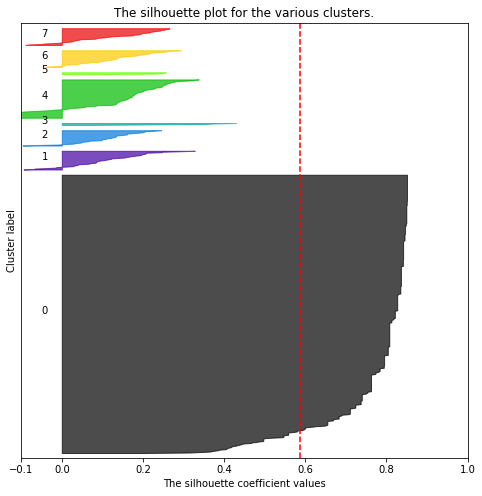

For n_clusters = 9 The average silhouette_score is : 0.391479779744


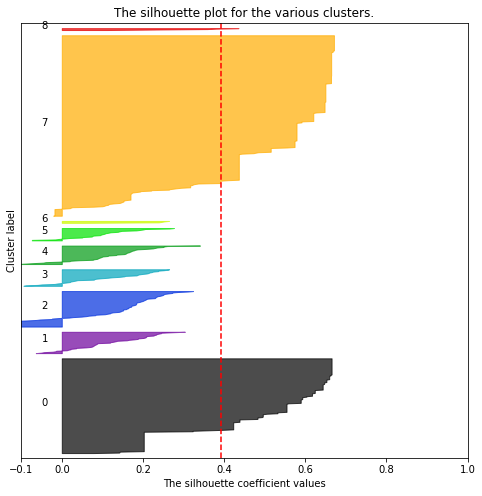

Max silhouette_score: 0.707573398358 when K = 2


In [125]:
K = silhouette_score_plot(df_scaled_1, range(2,10))

In [86]:
min_max_scaler_2 = MinMaxScaler()
df_scaled_2 = pd.DataFrame(min_max_scaler.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)

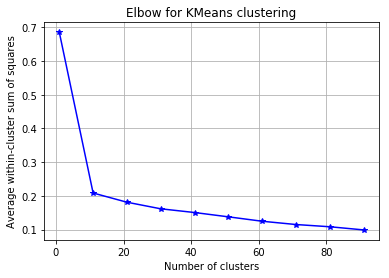

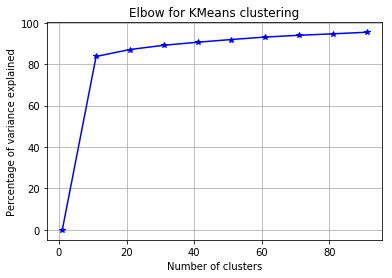

In [87]:
elbow(df_scaled_2, range(1,100,10))

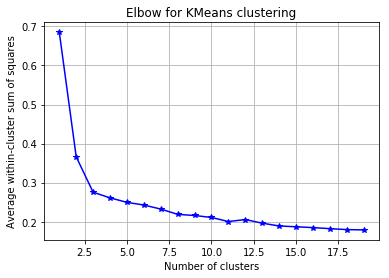

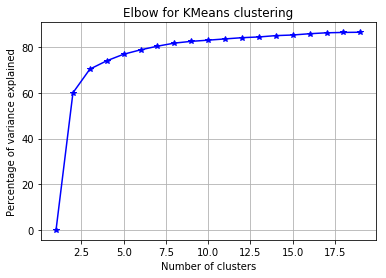

In [89]:
elbow(df_scaled_2, range(1,20))

For n_clusters = 2 The average silhouette_score is : 0.749914329804


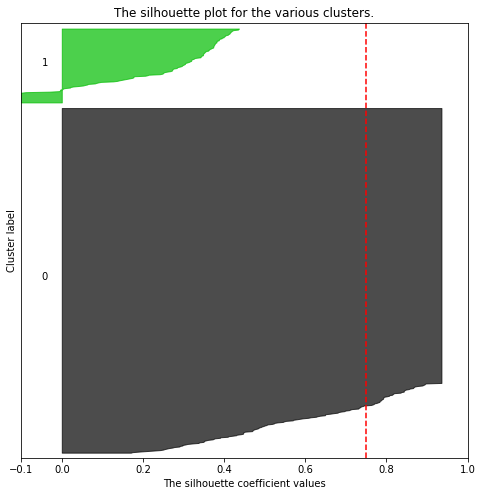

For n_clusters = 3 The average silhouette_score is : 0.72016306337


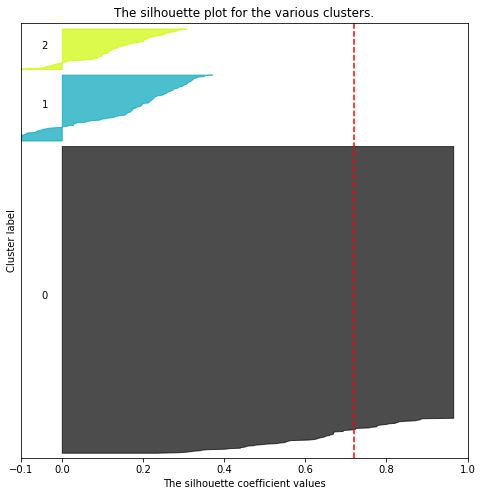

For n_clusters = 4 The average silhouette_score is : 0.720493311549


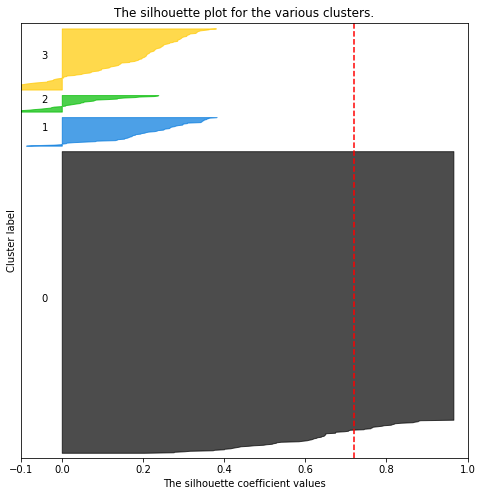

For n_clusters = 5 The average silhouette_score is : 0.720490176479


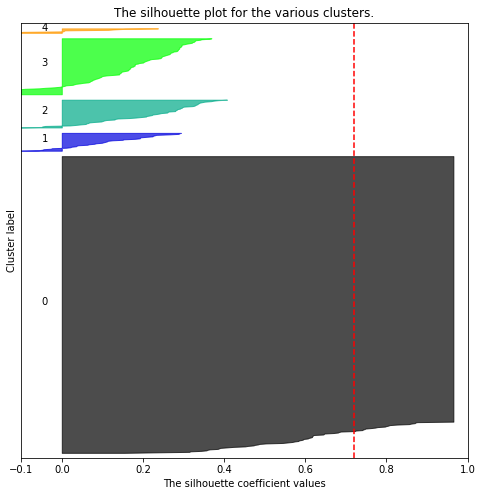

For n_clusters = 6 The average silhouette_score is : 0.71399287342


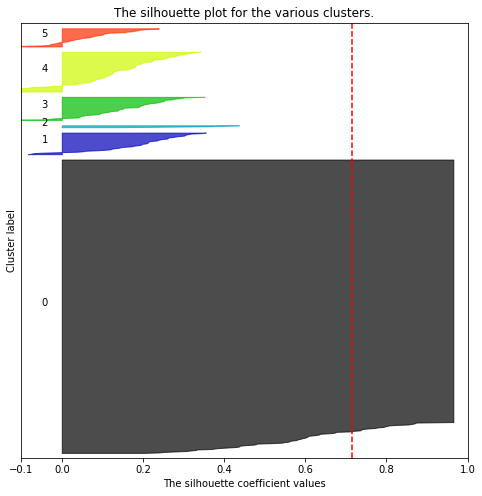

For n_clusters = 7 The average silhouette_score is : 0.717575096971


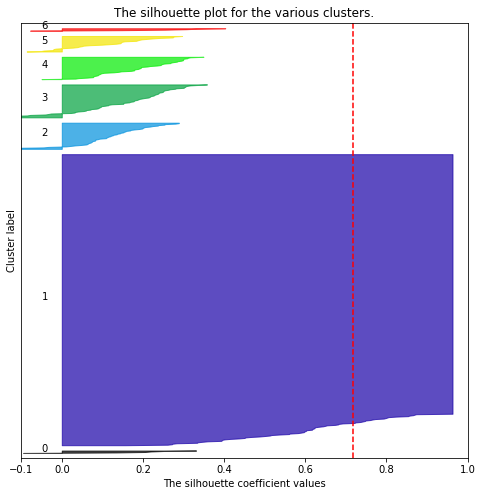

For n_clusters = 8 The average silhouette_score is : 0.70350601472


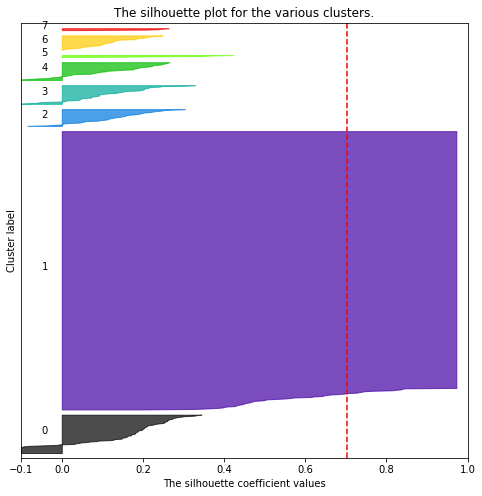

For n_clusters = 9 The average silhouette_score is : 0.700423684035


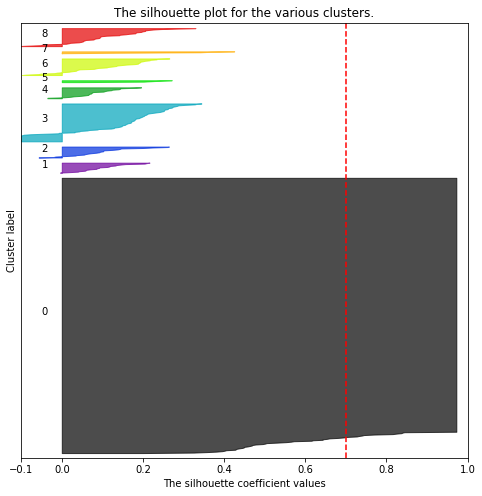

Max silhouette_score: 0.749914329804 when K = 2


In [126]:
K = silhouette_score_plot(df_scaled_2, range(2,10))

In [177]:
stations_ratio = stations_ratio.replace([np.inf, -np.inf], np.nan)

In [178]:
stations_ratio = stations_ratio.dropna()

In [179]:
stations_ratio.shape

(812, 48)

In [180]:
min_max_scaler_3 = MinMaxScaler()
df_scaled_3 = pd.DataFrame(min_max_scaler.fit_transform(stations_ratio), columns=stations_ratio.columns, index=stations_ratio.index)

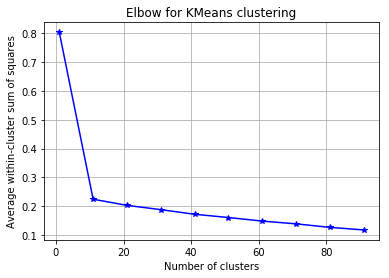

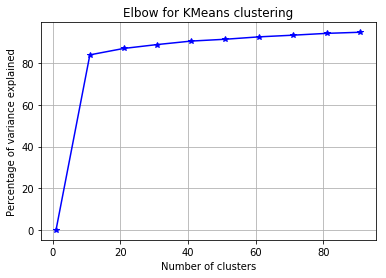

In [181]:
elbow(df_scaled_3, range(1,100,10))

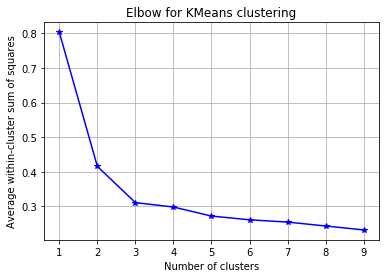

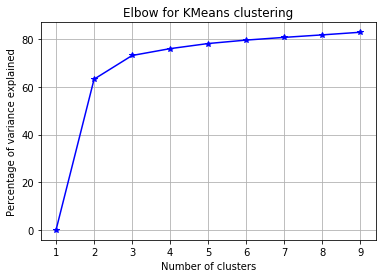

In [182]:
elbow(df_scaled_3, range(1,10))

For n_clusters = 2 The average silhouette_score is : 0.746420200075


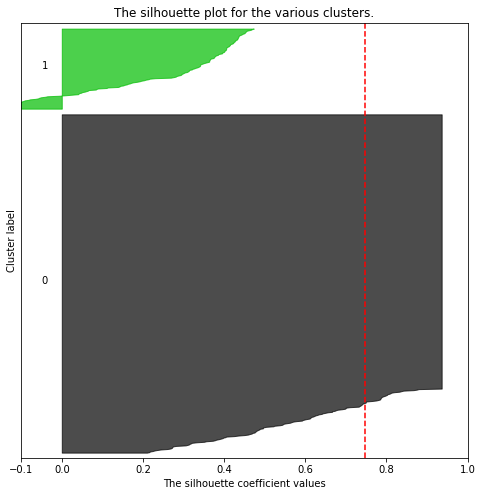

For n_clusters = 3 The average silhouette_score is : 0.712121940958


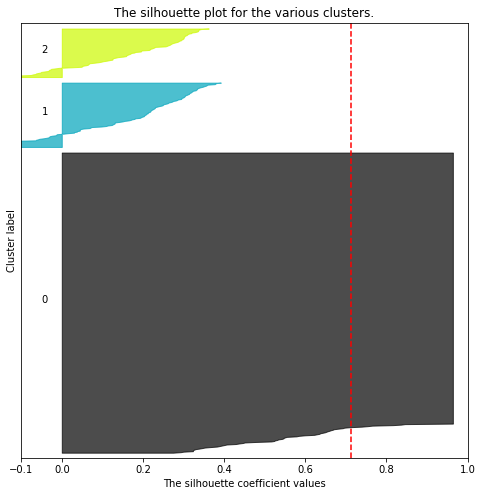

For n_clusters = 4 The average silhouette_score is : 0.706909202746


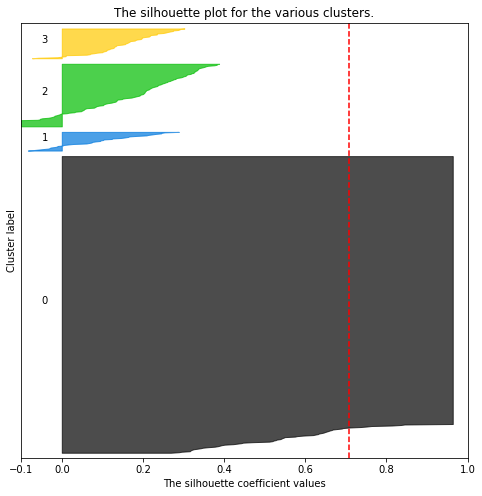

For n_clusters = 5 The average silhouette_score is : 0.695704303224


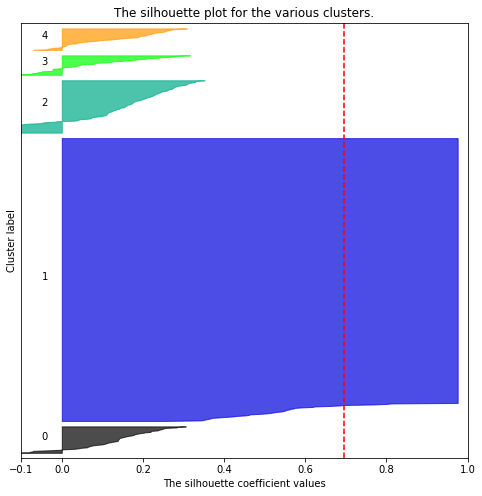

For n_clusters = 6 The average silhouette_score is : 0.692289745043


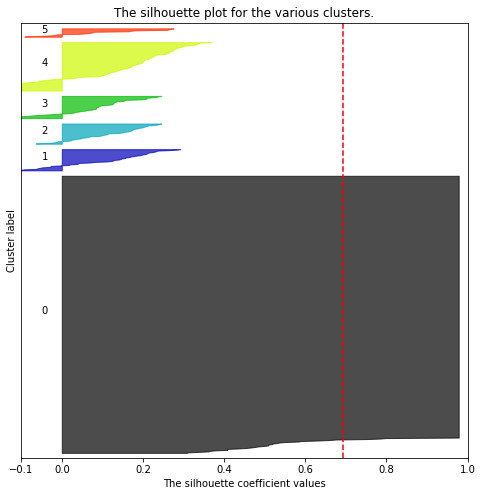

For n_clusters = 7 The average silhouette_score is : 0.691187370354


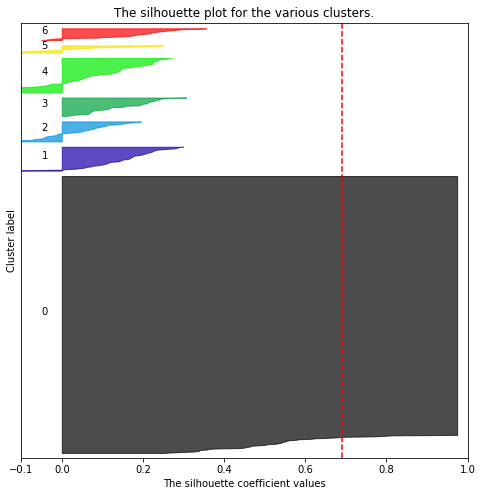

For n_clusters = 8 The average silhouette_score is : 0.689259291304


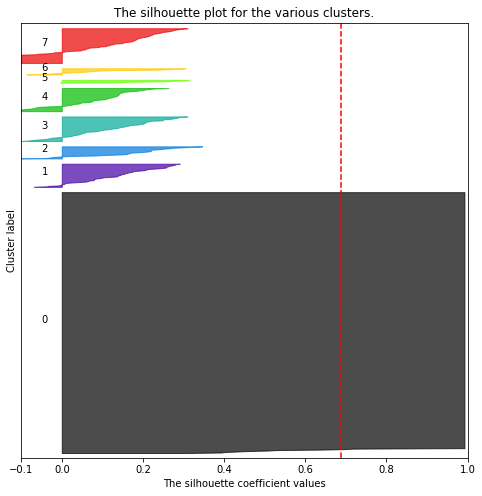

For n_clusters = 9 The average silhouette_score is : 0.687984371695


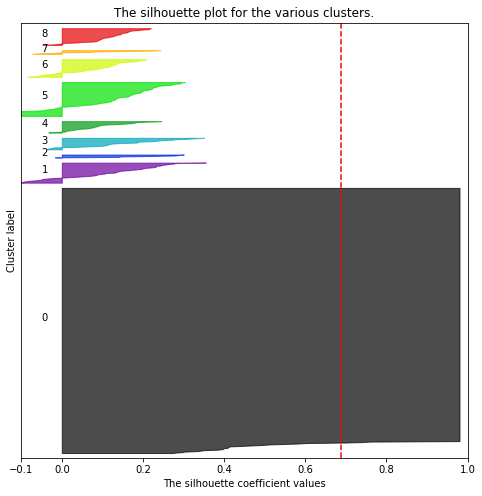

Max silhouette_score: 0.746420200075 when K = 2


In [183]:
K = silhouette_score_plot(df_scaled_3, range(2,10))

Model 3, k=3

In [184]:
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(stations_ratio), columns=stations_ratio.columns, index=stations_ratio.index)

In [185]:
clusterer = KMeans(n_clusters=6, random_state=324)
cluster_labels = clusterer.fit_predict(df_scaled)

In [186]:
stations_ratio.head()

startCount_0  endCount_0  startCount_1  endCount_1  startCount_2  \
station_id                                                                     
301             0.270270    0.405405      0.243243    0.162162      0.054054   
445             0.173077    0.557692      0.076923    0.250000      0.076923   
487             0.058824    0.529412      0.058824    0.205882      0.000000   
504             1.045455    0.727273      0.500000    0.340909      0.477273   
72              0.102564    0.076923      0.051282    0.051282      0.025641   

            endCount_2  startCount_3  endCount_3  startCount_4  endCount_4  \
station_id                                                                   
301           0.135135      0.027027    0.081081      0.270270    0.108108   
445           0.134615      0.076923    0.115385      0.019231    0.038462   
487           0.352941      0.058824    0.088235      0.088235    0.058824   
504           0.295455      0.181818    0.159091      0.136364    0.159091   
72            0.128205      0.000000    0.051282      0.000000    0.025641   

            startCount_5  endCount_5  startCount_6  endCount_6  startCount_7  \
station_id                                                                     
301             0.432432    0.108108      1.270270    0.135135      1.540541   
445             0.134615    0.115385      0.788462    0.269231      1.461538   
487             1.117647    0.029412      2.411765    0.117647      4.000000   
504             0.500000    0.181818      1.000000    0.545455      1.909091   
72              0.102564    0.230769      0.615385    0.076923      0.641026   

            endCount_7  startCount_8  endCount_8  startCount_9  endCount_9  \
station_id                                                                   
301           0.675676      2.594595    0.702703      1.945946    0.513514   
445           0.384615      3.769231    0.576923      3.903846    0.557692   
487           0.794118      3.647059    1.000000      1.588235    1.117647   
504           1.340909      4.272727    1.954545      3.590909    1.704545   
72            1.153846      1.487179    1.051282      1.102564    1.282051   

            startCount_10  endCount_10  startCount_11  endCount_11  \
station_id                                                           
301              1.567568     0.972973       1.648649     1.432432   
445              3.288462     1.019231       2.134615     0.942308   
487              0.823529     0.676471       1.617647     1.117647   
504              2.772727     2.386364       2.000000     2.227273   
72               1.666667     1.282051       1.025641     0.897436   

            startCount_12  endCount_12  startCount_13  endCount_13  \
station_id                                                           
301              1.540541     1.027027       1.243243     1.378378   
445              1.750000     1.019231       1.769231     1.307692   
487              1.529412     1.352941       1.500000     1.588235   
504              2.136364     2.568182       2.590909     2.477273   
72               0.923077     0.794872       0.692308     0.897436   

            startCount_14  endCount_14  startCount_15  endCount_15  \
station_id                                                           
301              1.243243     1.405405       1.729730     2.054054   
445              1.615385     1.519231       1.865385     2.326923   
487              1.705882     2.352941       1.676471     2.470588   
504              2.272727     2.318182       2.818182     2.886364   
72               0.846154     0.743590       1.282051     0.846154   

            startCount_16  endCount_16  startCount_17  endCount_17  \
station_id                                                           
301              1.864865     2.135135       1.864865     3.054054   
445              1.788462     1.846154       1.173077     1.942308   
487              2.382353     2.882353     

In [187]:
stations_ratio['label'] = cluster_labels

In [188]:
stations_ratio.head()

startCount_0  endCount_0  startCount_1  endCount_1  startCount_2  \
station_id                                                                     
301             0.270270    0.405405      0.243243    0.162162      0.054054   
445             0.173077    0.557692      0.076923    0.250000      0.076923   
487             0.058824    0.529412      0.058824    0.205882      0.000000   
504             1.045455    0.727273      0.500000    0.340909      0.477273   
72              0.102564    0.076923      0.051282    0.051282      0.025641   

            endCount_2  startCount_3  endCount_3  startCount_4  endCount_4  \
station_id                                                                   
301           0.135135      0.027027    0.081081      0.270270    0.108108   
445           0.134615      0.076923    0.115385      0.019231    0.038462   
487           0.352941      0.058824    0.088235      0.088235    0.058824   
504           0.295455      0.181818    0.159091      0.136364    0.159091   
72            0.128205      0.000000    0.051282      0.000000    0.025641   

            startCount_5  endCount_5  startCount_6  endCount_6  startCount_7  \
station_id                                                                     
301             0.432432    0.108108      1.270270    0.135135      1.540541   
445             0.134615    0.115385      0.788462    0.269231      1.461538   
487             1.117647    0.029412      2.411765    0.117647      4.000000   
504             0.500000    0.181818      1.000000    0.545455      1.909091   
72              0.102564    0.230769      0.615385    0.076923      0.641026   

            endCount_7  startCount_8  endCount_8  startCount_9  endCount_9  \
station_id                                                                   
301           0.675676      2.594595    0.702703      1.945946    0.513514   
445           0.384615      3.769231    0.576923      3.903846    0.557692   
487           0.794118      3.647059    1.000000      1.588235    1.117647   
504           1.340909      4.272727    1.954545      3.590909    1.704545   
72            1.153846      1.487179    1.051282      1.102564    1.282051   

            startCount_10  endCount_10  startCount_11  endCount_11  \
station_id                                                           
301              1.567568     0.972973       1.648649     1.432432   
445              3.288462     1.019231       2.134615     0.942308   
487              0.823529     0.676471       1.617647     1.117647   
504              2.772727     2.386364       2.000000     2.227273   
72               1.666667     1.282051       1.025641     0.897436   

            startCount_12  endCount_12  startCount_13  endCount_13  \
station_id                                                           
301              1.540541     1.027027       1.243243     1.378378   
445              1.750000     1.019231       1.769231     1.307692   
487              1.529412     1.352941       1.500000     1.588235   
504              2.136364     2.568182       2.590909     2.477273   
72               0.923077     0.794872       0.692308     0.897436   

            startCount_14  endCount_14  startCount_15  endCount_15  \
station_id                                                           
301              1.243243     1.405405       1.729730     2.054054   
445              1.615385     1.519231       1.865385     2.326923   
487              1.705882     2.352941       1.676471     2.470588   
504              2.272727     2.318182       2.818182     2.886364   
72               0.846154     0.743590       1.282051     0.846154   

            startCount_16  endCount_16  startCount_17  endCount_17  \
station_id                                                           
301              1.864865     2.135135       1.864865     3.054054   
445              1.788462     1.846154       1.173077     1.942308   
487              2.382353     2.882353     

In [189]:
stations_ratio = stations_ratio.reset_index()

In [190]:
stations_ratio.to_csv('Clean_Data/stations_class.csv', index=False)

read the shp file

In [191]:
otherdata = pd.read_csv('Clean_Data/citibike_spatial_joined.csv')

In [192]:
otherdata.head(1)

OBJECTID  Join_Count  TARGET_FID  Join_Count_1  TARGET_FID_1  capacity  \
0         1           1           1             1             1        37   

         lat        lon               name  short_name  station_id  \
0  40.722174 -73.983688  E 2 St & Avenue B     5515.02         301   

          DDLat          DDLon  ORIG_OID  OBJECTID_1  Shape_Leng  \
0  40.72218270N  073.98368923W         1          79    0.042625   

           zone  LocationID    borough  taxi_R_OBJECTID  taxi_R_tz  \
0  East Village          79  Manhattan               78         79   

   taxi_R_total  taxi_R_male  taxi_R_age_under_29  taxi_R_age_30_54  \
0         23766     0.503408             0.335984          0.501262   

   taxi_R_age_55_over  taxi_R_white  taxi_R_black  taxi_R_asian  \
0            0.162754      0.792561      0.065472      0.116216   

   taxi_R_others  taxi_R_two_or_more  taxi_R_less_high_school  \
0       0.005975            0.019776                 0.069259   

   taxi_R_high_school  taxi_R_college  taxi_R_bachelor  taxi_W_OBJECTID  \
0            0.120929        0.176513         0.297315               76   

   taxi_W_tz  taxi_W_total  taxi_W_male  taxi_W_age_under_29  \
0         79         26074      0.46951               0.2514   

   taxi_W_age_30_54  taxi_W_age_55_over  taxi_W_white  taxi_W_black  \
0          0.544182            0.204418      0.612411      0.218225   

   taxi_W_asian  taxi_W_others  taxi_W_two_or_more  taxi_W_less_high_school  \
0      0.142901       0.008438            0.018026                 0.100445   

   taxi_W_high_school  taxi_W_college  taxi_W_bachelor  \
0            0.157437         0.22509         0.265629   

   nyu_2451_34513_statefp  nyu_2451_34513_countyfp  nyu_2451_34513_tractce  \
0                      36                       61                    3002   

   nyu_2451_34513_geoid  nyu_2451_34513_name nyu_2451_34513_namelsad  \
0           36061003002                30.02      Census Tract 30.02   

  nyu_2451_34513_mtfcc nyu_2451_34513_funcstat  nyu_2451_34513_aland  \
0                G5020                       S                 78525   

   nyu_2451_34513_awater  nyu_2451_34513_intptlat  nyu_2451_34513_intptlon  \
0                      0                40.722964               -73.985866   

   nyu_2451_34513_ct  census_csv_CensusTract census_csv_County  \
0       3.606100e+10            3.606100e+10          New York   

  census_csv_Borough  census_csv_Income  census_csv_IncomePerCap  \
0          Manhattan            50625.0                  46124.0   

   census_csv_Drive  census_csv_Carpool  census_csv_Transit  census_csv_Walk  \
0               4.5                 0.3                59.5             22.2   

   census_csv_OtherTransp  census_csv_WorkAtHome  census_csv_MeanCommute  \
0                    10.3                    3.1                    29.6   

   census_csv_Employed  census_csv_PrivateWork  census_csv_PublicWork  \
0             0.687036                    82.6                    8.0   

   census_csv_SelfEmployed  census_csv_FamilyWork  census_csv_Unemployment  
0                      8.9                    0.5                      3.9

In [193]:
othershp = gpd.GeoDataFrame.from_file('GIS_files/shp_spatial_joined/citibike_yunhe.shp')

In [194]:
othershp.head()

OBJECTID  Join_Count  TARGET_FID  Join_Cou_1  TARGET_F_1  capacity  \
0         1           1           1           1           1        37   
1         2           1           2           1           2        52   
2         3           1           3           1           3        34   
3         4           1           4           1           4        44   
4         5           1           5           1           5        39   

         lat        lon                 name  short_name  station_id  \
0  40.722174 -73.983688    E 2 St & Avenue B     5515.02         301   
1  40.727408 -73.981420   E 10 St & Avenue A     5659.05         445   
2  40.733143 -73.975739  E 20 St & FDR Drive     5886.02         487   
3  40.732219 -73.981656      1 Ave & E 16 St     5779.08         504   
4  40.767272 -73.993929     W 52 St & 11 Ave     6926.01          72   

          DDLat          DDLon  ORIG_OID  OBJECTID_1  Shape_Leng  \
0  40.72218270N  073.98368923W         1          79    0.042625   
1  40.72741620N  073.98142150W         2          79    0.042625   
2  40.73315085N  073.97574025W         3         224    0.044020   
3  40.73222679N  073.98165701W         4         224    0.044020   
4  40.76728043N  073.99393033W         5          50    0.055748   

                             zone  LocationID    borough  taxi_R_OBJ  \
0                    East Village          79  Manhattan          78   
1                    East Village          79  Manhattan          78   
2  Stuy Town/Peter Cooper Village         224  Manhattan         222   
3  Stuy Town/Peter Cooper Village         224  Manhattan         222   
4                    Clinton West          50  Manhattan          49   

   taxi_R_tz  taxi_R_tot  taxi_R_mal  taxi_R_age  taxi_R_a_1  taxi_R_a_2  \
0         79       23766    0.503408    0.335984    0.501262    0.162754   
1         79       23766    0.503408    0.335984    0.501262    0.162754   
2        224       10453    0.471922    0.310246    0.479193    0.210562   
3        224       10453    0.471922    0.310246    0.479193    0.210562   
4         50        8282    0.556991    0.251509    0.597923    0.150567   

   taxi_R_whi  taxi_R_bla  taxi_R_asi  taxi_R_oth  taxi_R_two  taxi_R_les  \
0    0.792561    0.065472    0.116216    0.005975    0.019776    0.069259   
1    0.792561    0.065472    0.116216    0.005975    0.019776    0.069259   
2    0.800057    0.059600    0.114417    0.003731    0.022195    0.054912   
3    0.800057    0.059600    0.114417    0.003731    0.022195    0.054912   
4    0.713354    0.116276    0.144047    0.007969    0.018353    0.077035   

   taxi_R_hig  taxi_R_col  taxi_R_bac  taxi_W_OBJ  taxi_W_tz  taxi_W_tot  \
0    0.120929    0.176513    0.297315          76         79       26074   
1    0.120929    0.176513    0.297315          76         79       26074   
2    0.111164    0.176217    0.347460         218        224        1407   
3    0.111164    0.176217    0.347460         218        224        1407   
4    0.131490    0.197175    0.342792          48         50       25889   

   taxi_W_mal  taxi_W_age  taxi_W_a_1  taxi_W_a_2  taxi_W_whi  taxi_W_bla  \
0    0.469510    0.251400    0.544182    0.204418    0.612411    0.218225   
1    0.469510    0.251400    0.544182    0.204418    0.612411    0.218225   
2    0.611940    0.199716    0.538735    0.261549    0.668088    0.209666   
3    0.611940    0.199716    0.538735    0.261549    0.668088    0.209666   
4    0.614392    0.225115    0.608173    0.166712    0.681679    0.195179   

   taxi_W_asi  taxi_W_oth  taxi_W_two  taxi_W_les  taxi_W_hig  taxi_W_col  \
0    0.142901    0.008438    0.018026    0.100445    0.157437    0.225090   
1    0.142901    0.008438    0.018026    0.100445    0.157437    0.225090   
2    0.095238    0.009950    0.017058    0.169865    0.178394    0.233120   
3    0.095238    0.009950    0.017058    0.169865    0.178394    0.233120   
4    0.100042    0.007185    0.015914    0.078952    0.141064   

In [195]:
othershp.shape

(768, 83)

In [196]:
othershp_raw = othershp

In [197]:
othershp = othershp.merge(stations_ratio, how='left', left_on='station_id', right_on = 'station_id')

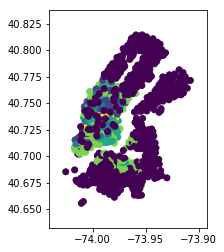

In [198]:
othershp.plot('label')

1. 分析label分类后的结果，与census（work/reside, female/male, old/yound)的分布关系。画出gis图片从而直观感受 / 空间 correlation

2. 空载率 --- real time

3. 各个类别的feature --- 从早到晚的使用情况（mean --- start and end）/ 空载率（各个时间段）/ tripduration / 使用性别和居住 or 人口性别

4. 在各个类别内的特定时间，分别建立线性模型，分析对该类别站点影响最大的数据

5. 


6. The different type of city bike station and the problem they suffer?

7. So different type --- affect / feature / promble 

8. some special type (night / around)